# **PROJECT 1 - NETFLIX DATA: CLEANING, ANALYSIS AND VISUALIZATION**








## STEP 1 :- IMPORT REQUIRED LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## STEP 2 :- LOAD  THE DATASET

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/netflix1.csv')
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [ ]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
print(data.tail())

     show_id     type               title   director        country  \
8785   s8797  TV Show          Yunus Emre  Not Given         Turkey   
8786   s8798  TV Show           Zak Storm  Not Given  United States   
8787   s8801  TV Show  Zindagi Gulzar Hai  Not Given       Pakistan   
8788   s8784  TV Show                Yoko  Not Given       Pakistan   
8789   s8786  TV Show                 YOM  Not Given       Pakistan   

      date_added  release_year rating   duration  \
8785   1/17/2017          2016  TV-PG  2 Seasons   
8786   9/13/2018          2016  TV-Y7  3 Seasons   
8787  12/15/2016          2012  TV-PG   1 Season   
8788   6/23/2018          2016   TV-Y   1 Season   
8789    6/7/2018          2016  TV-Y7   1 Season   

                                              listed_in  
8785                  International TV Shows, TV Dramas  
8786                                           Kids' TV  
8787  International TV Shows, Romantic TV Shows, TV ...  
8788                        

In [ ]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.shape

(8790, 10)

In [ ]:
data.size

87900

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
data['show_id'].value_counts()

,count
show_id,
s8786,1
s1,1
s3,1
s6,1
s14,1
...,...
s941,1
s940,1
s13,1


In [ ]:
data['show_id'].describe()

,show_id
count,8790
unique,8790
top,s8786
freq,1


In [ ]:
data['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


In [ ]:
data['rating'].describe()

,rating
count,8790
unique,14
top,TV-MA
freq,3205


In [ ]:
data['director'].value_counts()

,count
director,
Not Given,2588
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
...,...
Mark Risley,1
Kirati Nakintanon,1
Christian De Vita,1


In [ ]:
data['director'].describe()

,director
count,8790
unique,4528
top,Not Given
freq,2588


In [ ]:
data['country'].value_counts()

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
...,...
Luxembourg,1
Senegal,1
Belarus,1


In [ ]:
data['country'].describe()

,country
count,8790
unique,86
top,United States
freq,3240


# STEP 3 :- DATA CLEANING

In [ ]:
print(data.isnull().sum())      #Check for missing values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


## **DROP DUPLICATES**

In [ ]:
data.duplicated().sum()       #Check for duplicated value

np.int64(0)

In [ ]:
data.drop_duplicates(inplace=True)        #Drop duplicates
print(data.shape)

(8790, 10)


In [ ]:
data['date_added']=pd.to_datetime(data['date_added'])   #Convert 'date_added' to 'datetime'
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States 2021-09-25          2020  PG-13    90 min   
1         France 2021-09-24          2021  TV-MA  1 Season   
2  United States 2021-09-24          2021  TV-MA  1 Season   
3         Brazil 2021-09-22          2021  TV-PG    91 min   
4  United States 2021-09-24          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [ ]:
print(data.dtypes)  #show data types

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


## STEP4:- EXPLORATORY DATA ANALYSIS(EDA)

## **1.Content Type Distribution (Movies vs. TV Shows**)

In [ ]:
type_counts = data['type'].value_counts()           #Count the numbers of movies and TV shows
print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


In [ ]:
data['type'].describe()

,type
count,8790
unique,2
top,Movie
freq,6126


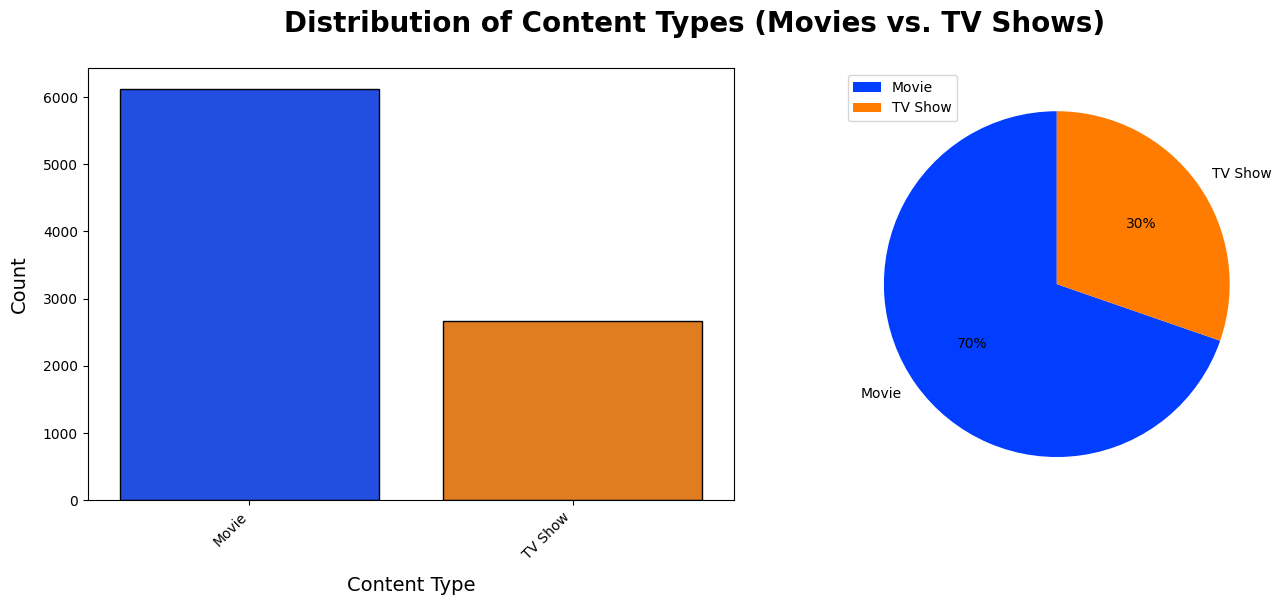

In [ ]:
#Plot the distribution
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette='bright',edgecolor='black')
plt.suptitle('Distribution of Content Types (Movies vs. TV Shows)',fontsize=20, fontweight='bold', y=1)
plt.xlabel('Content Type',fontsize=14, labelpad=10)
plt.ylabel('Count',fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
plt.pie(type_counts, labels=type_counts.index, autopct='%.0f%%', startangle=90, colors=sns.color_palette('bright'))
plt.tight_layout()
plt.legend(loc=2)
plt.show()

## **2.Most Common Genres**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/netflix1.csv")
genres = df['listed_in'].str.split(', ').explode()  # Split multiple genres
genre_counts = genres.value_counts()  # Count occurrences
print(genre_counts)

listed_in
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows             

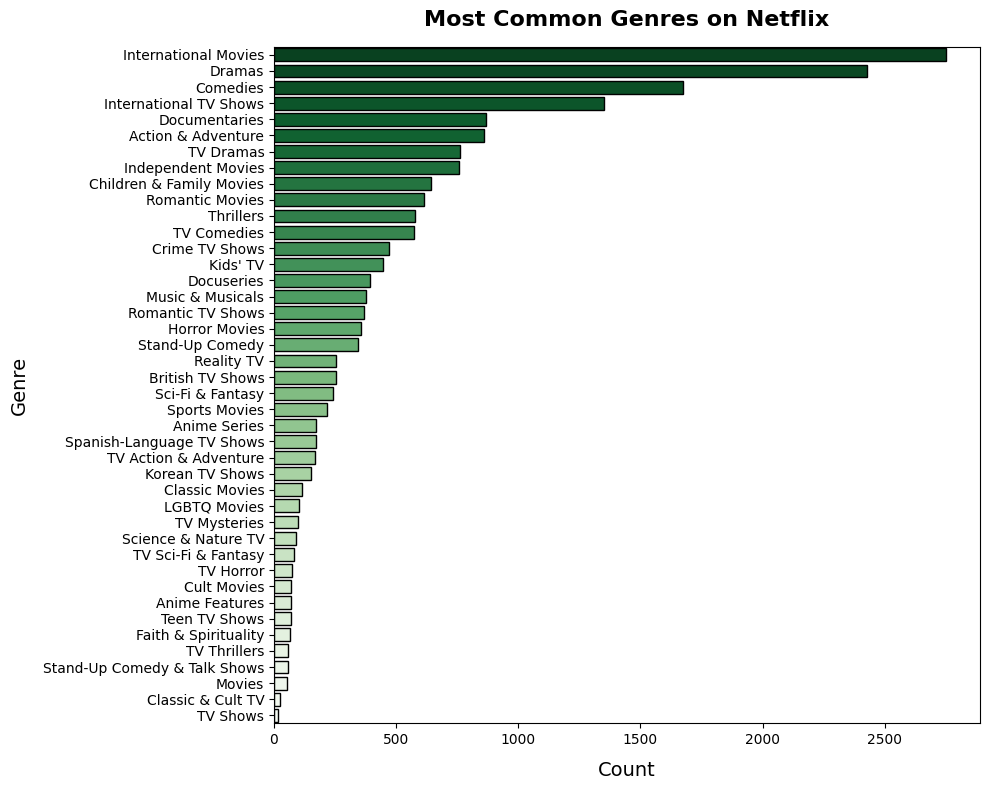

In [ ]:
#Plot the most common genres
plt.figure(figsize=(10,8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette='Greens_r',edgecolor='black')
plt.title('Most Common Genres on Netflix',fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Count',fontsize=14, labelpad=10)
plt.ylabel('Genre',fontsize=14, labelpad=10)
plt.tight_layout()
plt.show()

## The Top 10 Genres on Netflix

In [ ]:
top_10_genres = genre_counts.head(10)
print(top_10_genres)

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


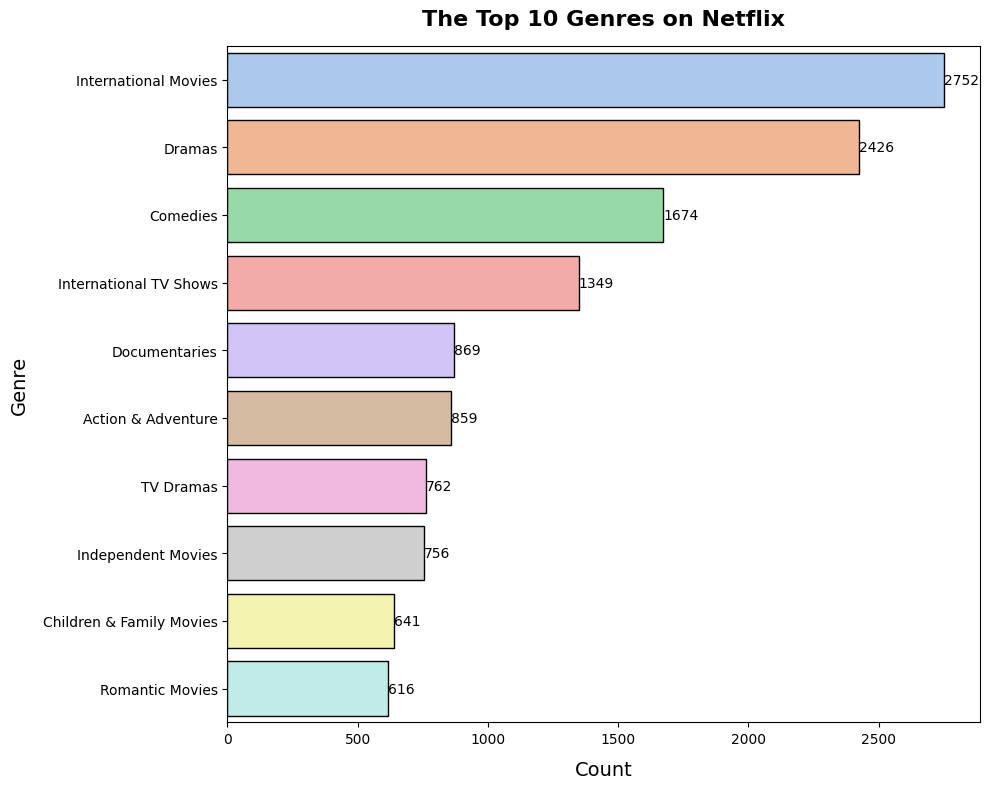

In [ ]:
#Plot the top 10 genres
plt.figure(figsize=(10,8))
ax=sns.barplot(x=top_10_genres.values, y=top_10_genres.index, hue=top_10_genres.index, palette='pastel',edgecolor='black')
plt.title('The Top 10 Genres on Netflix',fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Count',fontsize=14, labelpad=10)
plt.ylabel('Genre',fontsize=14, labelpad=10)
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2,
            int(p.get_width()), ha='left', va='center')
    plt.tight_layout()
plt.show()
#ax.text(x, y, text) → Places the count on the bar
# p.get_width() → Gets the count value (bar length)
# p.get_y() + p.get_height()/2 → Centers the text on the bar

## 3.**Content Added Over Time**

In [ ]:
#Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
# Show only the 'year_added' column
print(data['year_added'])

# Show only the 'month_added' column
print(data['month_added'])


0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8785    2017
8786    2018
8787    2016
8788    2018
8789    2018
Name: year_added, Length: 8790, dtype: int32
0        9
1        9
2        9
3        9
4        9
        ..
8785     1
8786     9
8787    12
8788     6
8789     6
Name: month_added, Length: 8790, dtype: int32


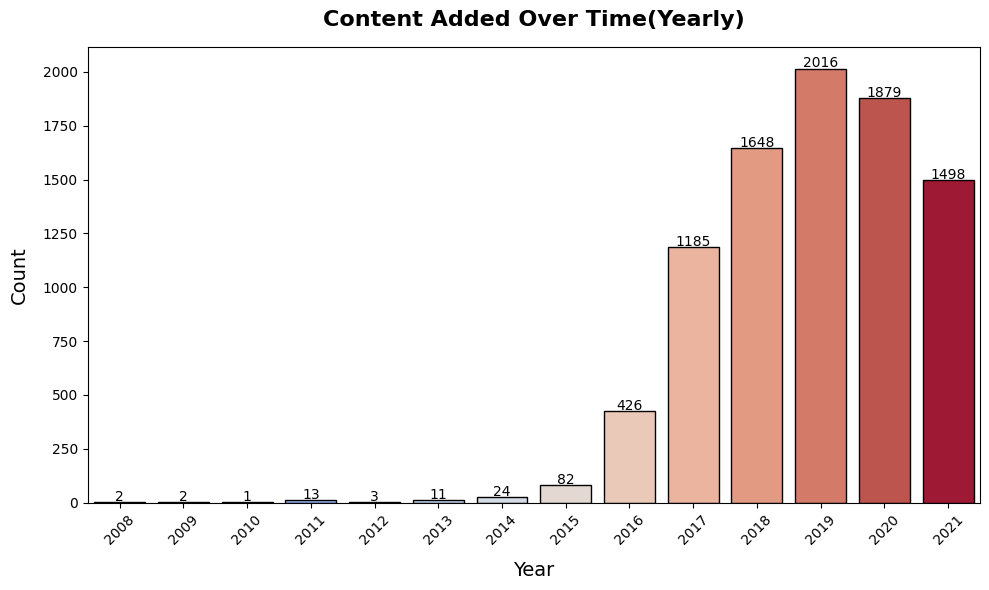

In [ ]:
#Plot content added over the years
plt.figure(figsize=(10,6))
ax=sns.countplot(x='year_added', data=data,hue='year_added',legend=False, palette='coolwarm',edgecolor='black')
plt.title('Content Added Over Time(Yearly)',fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Year',fontsize=14, labelpad=10)
plt.ylabel('Count',fontsize=14, labelpad=10)
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    if height > 0:                                                        # Avoid labeling zero-height bars
        ax.text(
            p.get_x() + p.get_width() / 2.,                               # center text on bar
            height + 5,                                                   # slightly above bar
            int(height),                                                  # the count value
            ha="center", fontsize=10
        )

plt.tight_layout()
plt.show()

## **4.Top 10 Directors with the Most Titles**

In [ ]:
#Count titles by director
top_directors = data['director'].value_counts().head(10)
print(top_directors)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Name: count, dtype: int64


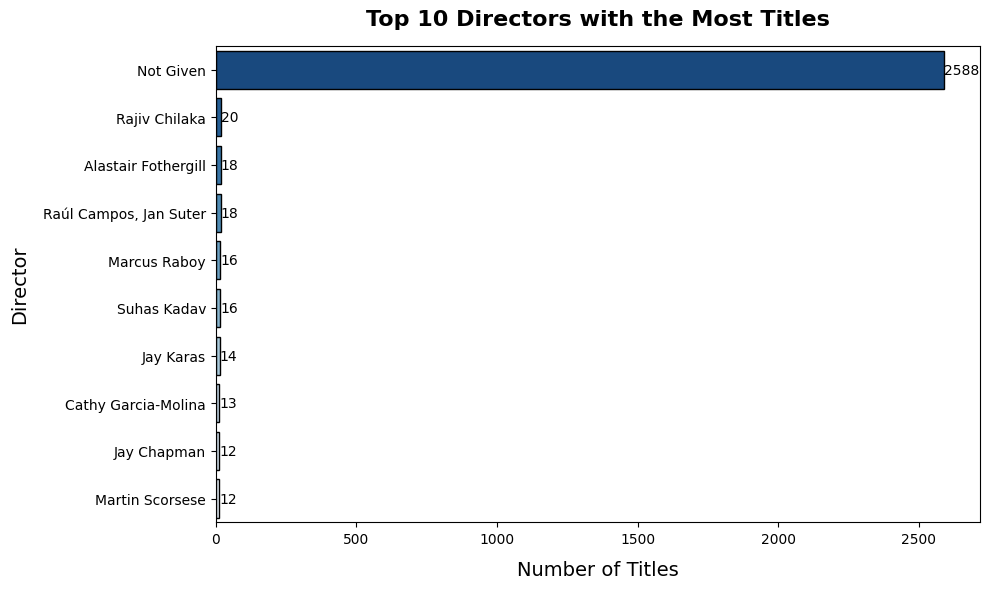

In [ ]:
#plot top directors
plt.figure(figsize=(10,6))
ax=sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.index, palette='Blues_r',edgecolor='black')
plt.title('Top 10 Directors with the Most Titles',fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Titles',fontsize=14, labelpad=10)
plt.ylabel('Director',fontsize=14, labelpad=10)
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2,
            int(p.get_width()), ha='left', va='center')
    plt.tight_layout()
plt.show()


In [ ]:
data.shape

(8790, 12)

## **5.Word Cloud of Movie Titles**

In [ ]:
#Generate Word Cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(movie_titles))



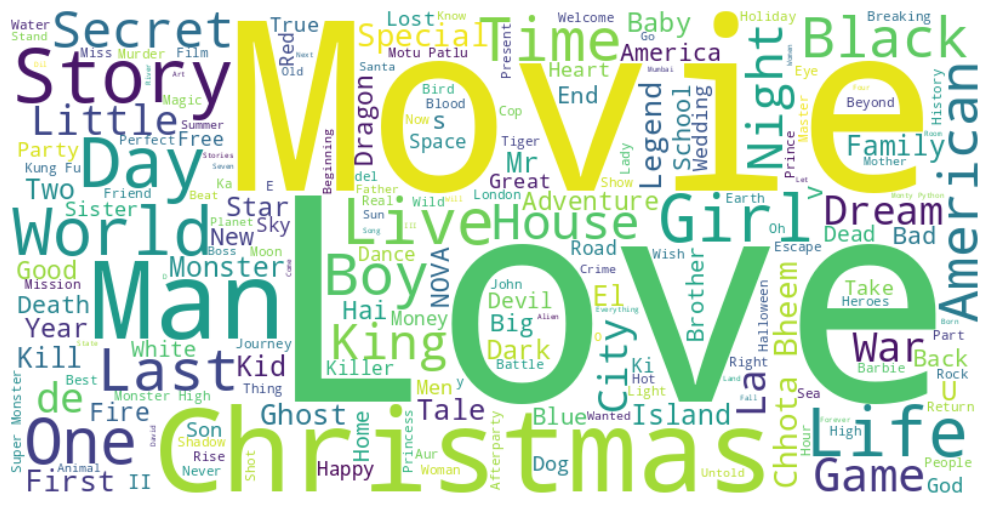

In [ ]:
# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()                 # Hide axes
plt.show()

## **6.Rating frequency on Netflix**

In [ ]:
ratings=data['rating'].value_counts()
ratings

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


In [ ]:
ratings = data['rating'].value_counts().reset_index()
ratings.columns = ['rating', 'count']  # Renaming the columns
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


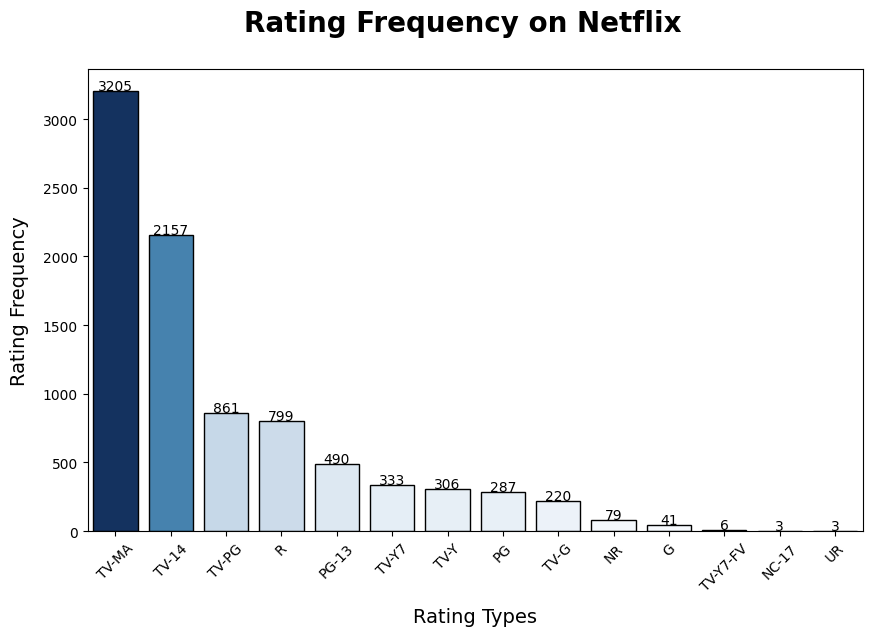

In [ ]:
#plot rating on netflix
plt.figure(figsize=(10,6))
ax=sns.barplot(x=ratings['rating'], y=ratings['count'],hue=ratings['count'],palette='Blues',edgecolor='black',legend=False)
plt.suptitle('Rating Frequency on Netflix',fontsize=20, fontweight='bold')
plt.xlabel('Rating Types',fontsize=14, labelpad=10)
plt.ylabel('Rating Frequency',fontsize=14, labelpad=10)
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    if height > 0:                                                        # Avoid labeling zero-height bars
        ax.text(
            p.get_x() + p.get_width() / 2.,                               # center text on bar
            height + 7,                                                   # slightly above bar
            int(height),                                                  # the count value
            ha="center", fontsize=10
        )
plt.show()

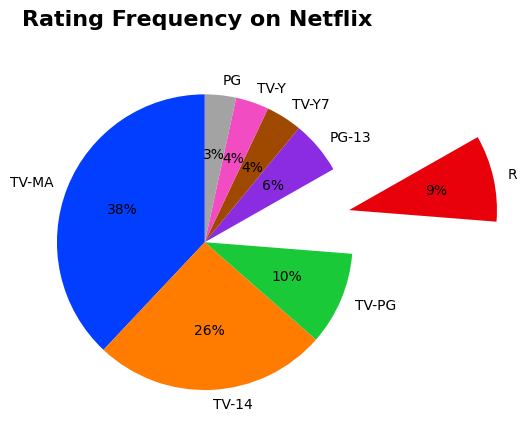

In [ ]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%', explode=[0,0,0,1,0,0,0,0],startangle=90,colors=sns.color_palette('bright'))
plt.suptitle('Rating Frequency on Netflix',fontsize=16, fontweight='bold')
plt.show()


In [ ]:
data.describe()

,date_added,release_year,year_added,month_added
count,8790,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.825466,1.573568,3.436103


In [ ]:
data['country'].value_counts()

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
...,...
Luxembourg,1
Senegal,1
Belarus,1


## **7.Top 10 countries with most content on Netflix**

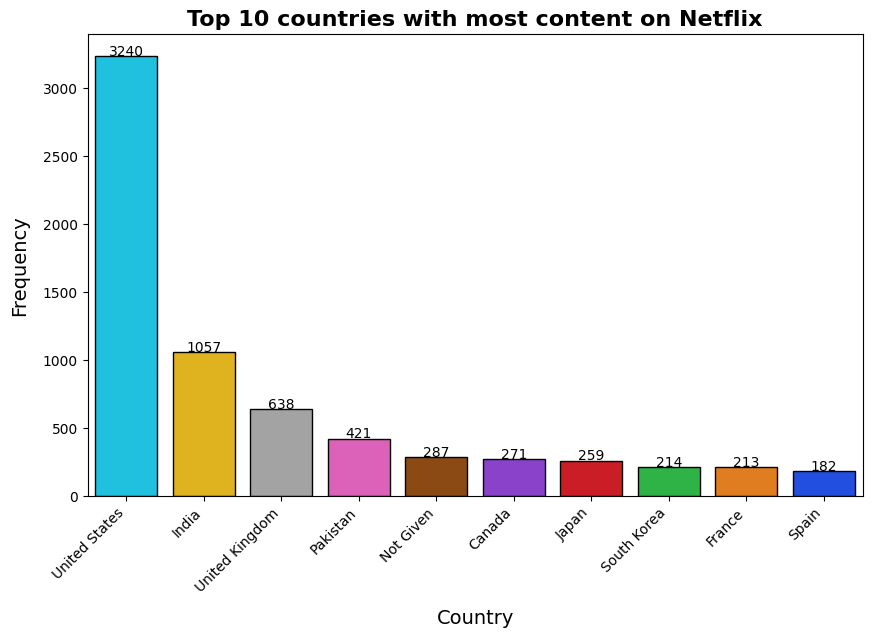

In [ ]:
#plot
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
ax=sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.values,palette= 'bright', edgecolor='black',legend=False)
plt.title('Top 10 countries with most content on Netflix',fontsize=16, fontweight='bold')
plt.xlabel('Country',fontsize=14, labelpad=10)
plt.ylabel('Frequency',fontsize=14, labelpad=10)
plt.xticks(rotation=45,ha='right')
for p in ax.patches:
    height = p.get_height()
    if height > 0:                                                        # Avoid labeling zero-height bars
        ax.text(
            p.get_x() + p.get_width() / 2.,                               # center text on bar
            height + 5,                                                   # slightly above bar
            int(height),                                                  # the count value
            ha="center", fontsize=10
        )
plt.show()

In [ ]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

In [ ]:
data['year']

,year
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
8785,2017
8786,2018
8787,2016
8788,2018


In [ ]:
data['month']

,month
0,9
1,9
2,9
3,9
4,9
...,...
8785,1
8786,9
8787,12
8788,6


In [ ]:
data['day']

,day
0,25
1,24
2,24
3,22
4,24
...,...
8785,17
8786,13
8787,15
8788,23


## **8.Monthly releases of Movies and TV shows on Netflix**

In [ ]:
monthly_movie_release=data[data['type']=='Movie'].groupby('month')['title'].count()
monthly_tv_release=data[data['type']=='TV Show'].groupby('month')['title'].count()
monthly_movie_release

,title
month,
1,545
2,382
3,528
4,549
5,439
6,492
7,565
8,518
9,518


In [ ]:
monthly_tv_release

,title
month,
1,192
2,180
3,213
4,214
5,193
6,236
7,262
8,236
9,251


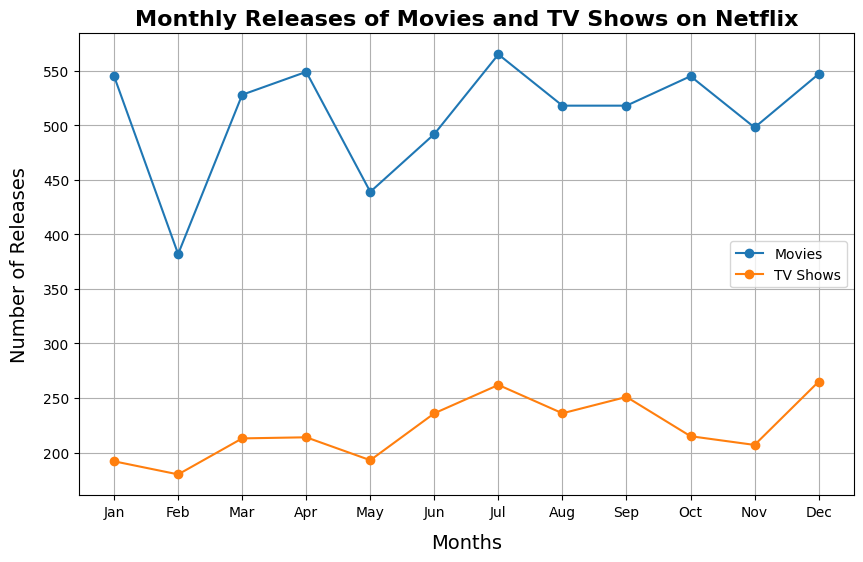

In [ ]:
#plot monthly releases of Movies and TV shows on Netflix
plt.figure(figsize=(10,6))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies',marker='o')
plt.plot(monthly_tv_release.index, monthly_tv_release.values, label='TV Shows', marker='o')
plt.title('Monthly Releases of Movies and TV Shows on Netflix',fontsize=16, fontweight='bold')
plt.xlabel('Months',fontsize=14, labelpad=10)
plt.ylabel('Number of Releases',fontsize=14, labelpad=10)
plt.legend()
plt.grid(True)
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

## **9.Yearly releases of Movies and TV Shows on Netflix**

In [ ]:
#Plot for Yearly releases of Movies and TV Shows on Netflix
yearly_movie_release=data[data['type']=='Movie'].groupby('year')['title'].count()
yearly_tv_release=data[data['type']=='TV Show'].groupby('year')['title'].count()
yearly_movie_release

,title
year,
2008,1
2009,2
2010,1
2011,13
2012,3
2013,6
2014,19
2015,56
2016,251


In [ ]:
yearly_tv_release

,title
year,
2008,1
2013,5
2014,5
2015,26
2016,175
2017,349
2018,411
2019,592
2020,595


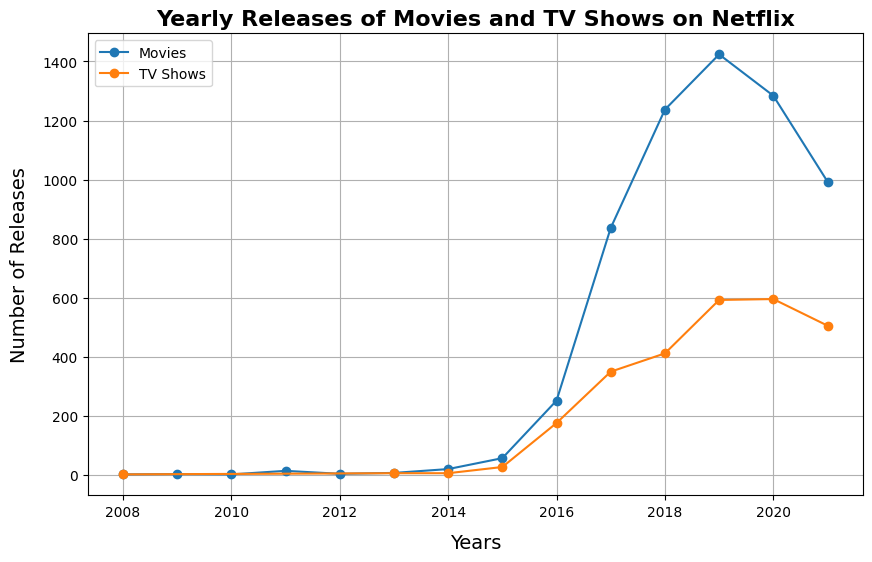

In [ ]:
#Plot for Yearly releases of Movies and TV Shows on Netflix
plt.figure(figsize=(10,6))
plt.plot(yearly_movie_release.index, yearly_movie_release.values, label='Movies',marker='o')
plt.plot(yearly_tv_release.index, yearly_tv_release.values, label='TV Shows', marker='o')
plt.title('Yearly Releases of Movies and TV Shows on Netflix',fontsize=16, fontweight='bold')
plt.xlabel('Years',fontsize=14, labelpad=10)
plt.ylabel('Number of Releases',fontsize=14, labelpad=10)
plt.legend()
plt.grid(True)
plt.show()

## **10.Top 10 popular movie genres**

In [ ]:
popular_movies = data[data['type'] == 'Movie']
popular_movies['listed_in'] = popular_movies['listed_in'].str.split(', ')
popular_movies = popular_movies.explode('listed_in')
popular_movies

<ipython-input-84-436f59161331>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_movies['listed_in'] = popular_movies['listed_in'].str.split(', ')


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,2021,9,25
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Children & Family Movies,2021,9,2021,9,22
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Comedies,2021,9,2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Dramas,2021,9,2021,9,24
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Independent Movies,2021,9,2021,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8716,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,Dramas,2019,4,2019,4,8
8716,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,International Movies,2019,4,2019,4,8
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89 min,Dramas,2017,1,2017,1,15
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89 min,International Movies,2017,1,2017,1,15


In [ ]:
popular_movies_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_movies_genre

,0
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186
"Dramas, International Movies, Romantic Movies",180


In [ ]:
#plot for top 10 popular movie genres
#popular_movies_genres = popular_movies['listed_in'].value_counts().head(10)
#popular_movies_genres

,count
listed_in,
International Movies,2752
Dramas,2426
Comedies,1674
Documentaries,869
Action & Adventure,859
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616
Thrillers,577


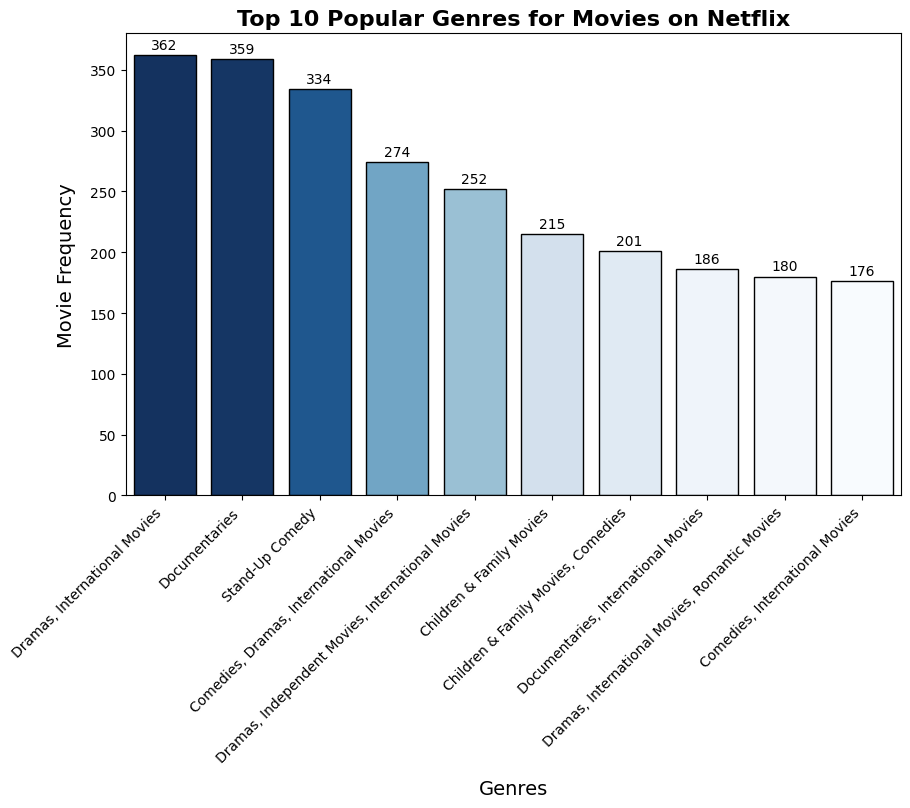

In [ ]:
#plot for top 10 popular movie genres
plt.figure(figsize=(10,6))
ax=sns.barplot(x=popular_movies_genre.index, y=popular_movies_genre.values, hue=popular_movies_genre.values, palette='Blues',edgecolor='black',legend=False)
plt.title('Top 10 Popular Genres for Movies on Netflix',fontsize=16, fontweight='bold')
plt.xlabel('Genres',fontsize=14, labelpad=10)
plt.ylabel('Movie Frequency',fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    if height > 0:                                                        # Avoid labeling zero-height bars
        ax.text(
            p.get_x() + p.get_width() / 2.,                               # center text on bar
            height + 5,                                                   # slightly above bar
            int(height),                                                  # the count value
            ha="center", fontsize=10
        )
plt.show()



In [ ]:
#plot for top 10 popular movie genres more clearly
popular_movies_genres = popular_movies['listed_in'].value_counts().head(10)
popular_movies_genres

,count
listed_in,
International Movies,2752
Dramas,2426
Comedies,1674
Documentaries,869
Action & Adventure,859
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616
Thrillers,577


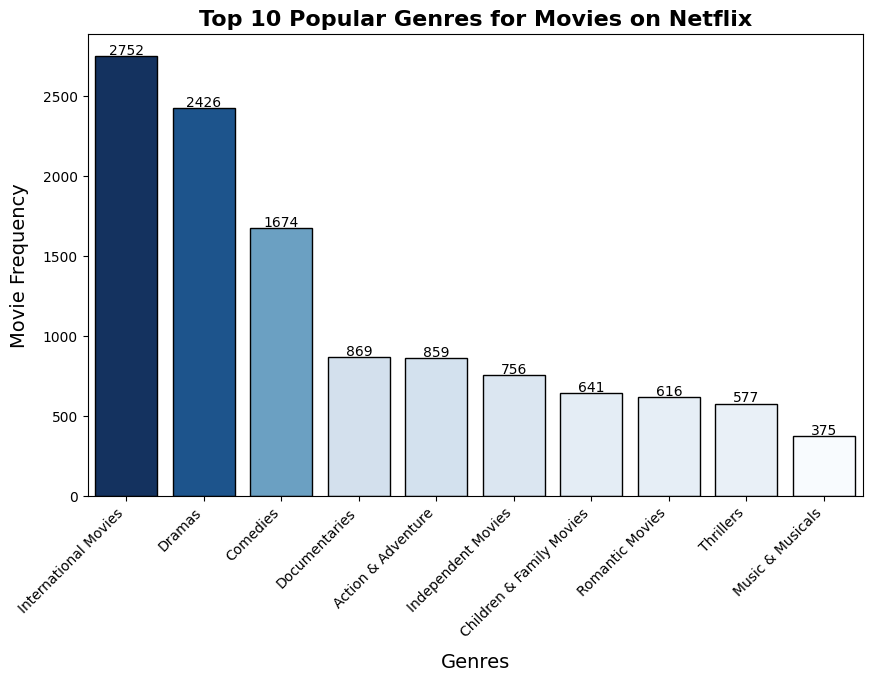

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=popular_movies_genres.index, y=popular_movies_genres.values, hue=popular_movies_genres.values, palette='Blues',edgecolor='black',legend=False)
plt.title('Top 10 Popular Genres for Movies on Netflix',fontsize=16, fontweight='bold')
plt.xlabel('Genres',fontsize=14, labelpad=10)
plt.ylabel('Movie Frequency',fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    if height > 0:                                                        # Avoid labeling zero-height bars
        ax.text(
            p.get_x() + p.get_width() / 2.,                               # center text on bar
            height + 10,                                                   # slightly above bar
            int(height),                                                  # the count value
            ha="center", fontsize=10
        )
plt.show()

In [ ]:
#plot for top 10 popular TV genres
popular_series_genre=data[data['type']=='TV Show']['listed_in'].str.split(', ').explode().value_counts().head(10)
popular_series_genre

,count
listed_in,
International TV Shows,1349
TV Dramas,762
TV Comedies,573
Crime TV Shows,469
Kids' TV,448
Docuseries,394
Romantic TV Shows,370
Reality TV,255
British TV Shows,252


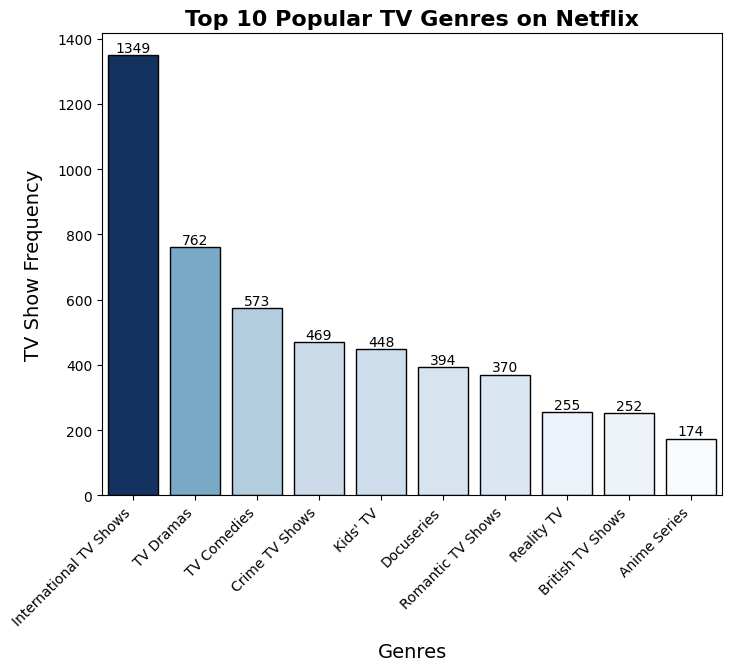

In [ ]:
#plot for top 10 popular TV genres
plt.figure(figsize=(8,6))
ax=sns.barplot(x=popular_series_genre.index, y=popular_series_genre.values, hue=popular_series_genre.values, palette='Blues',edgecolor='black',legend=False)
plt.title('Top 10 Popular TV Genres on Netflix',fontsize=16, fontweight='bold')
plt.xlabel('Genres',fontsize=14, labelpad=10)
plt.ylabel('TV Show Frequency',fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    if height > 0:                                                        # Avoid labeling zero-height bars
        ax.text(
            p.get_x() + p.get_width() / 2.,                               # center text on bar
            height + 10,                                                   # slightly above bar
            int(height),                                                  # the count value
            ha="center", fontsize=10
        )
plt.show()

## **11.Top 15 directors across Netflix with high frequency of movies and shows**

In [ ]:
directors=data['director'].value_counts().reset_index()[1:15]
directors

,director,count
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,14
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12
10,Youssef Chahine,12


In [ ]:
directors=data['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:15]
directors

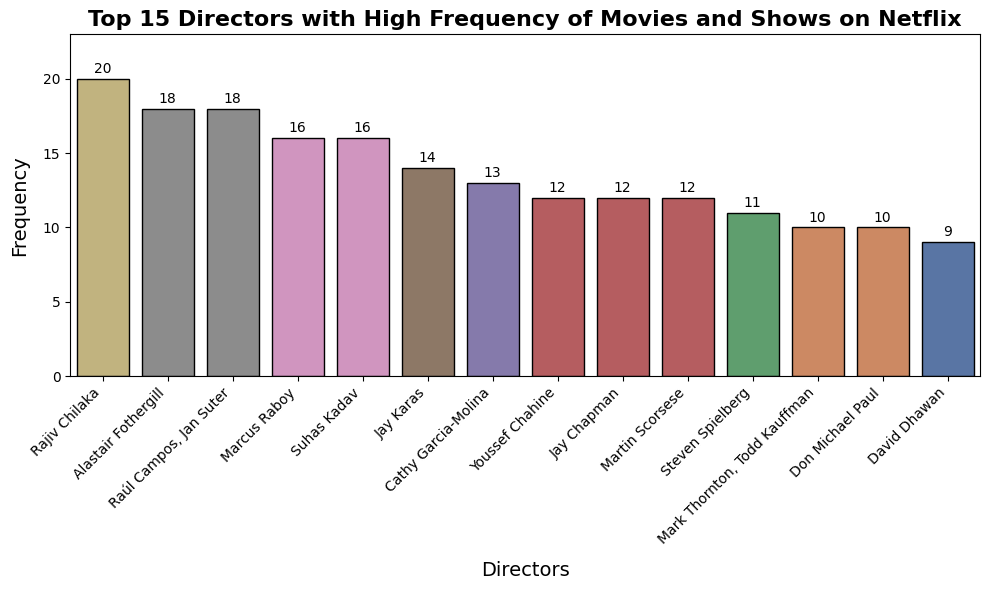

In [ ]:
# Plot for Top 15 directors across Netflix with high frequency of movies and shows
plt.figure(figsize=(10,6))
ax=sns.barplot(x=directors['director'], y=directors['count'], hue=directors['count'], palette='deep',edgecolor='black',legend=False)
plt.xlabel('Directors',fontsize=14, labelpad=10)
plt.ylabel('Frequency',fontsize=14, labelpad=10)
plt.title('Top 15 Directors with High Frequency of Movies and Shows on Netflix',fontsize=16, fontweight='bold')
plt.xticks(rotation=45,ha='right')
#Add number labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + (max(directors['count']) * 0.01),            # dynamic spacing
            int(height),
            ha='center',
            va='bottom',
            fontsize=10
        )

# Expand y-limit to fit text
plt.ylim(0, max(directors['count']) + max(directors['count']) * 0.15)
plt.tight_layout()
plt.show()



## **12.Final Conclusion**

In [ ]:
import textwrap

# List of conclusion points
conclusions = [
    "The analysis shows that Movies are more prevalent on the platform than TV Shows.",
    "The most common genres are Drama and Comedy, indicating a preference for entertaining content.",
    "Content production has increased significantly after 2015, reflecting a rise in streaming demand.",
    "Most TV Shows have multiple seasons, while Movies are usually standalone.",
    "International TV shows and International Movies are top Genres on Netflix.",
    "The United States produces the highest number of titles, followed by India and the UK.",
    "Spain has the least amount of content available on Netflix among the listed countries.",
    "Most movies are released in the month of July, indicating a possible seasonal trend.",
    "TV shows reach their release peak in December and July, suggesting higher viewer engagement during holidays or breaks.",
    "Rajiv Chilaka emerges as the top director with the highest number of titles on the platform."
]

# Print each point in a formatted way
print("\n" + "="*50)
print("PROJECT CONCLUSION".center(50))
print("="*50 + "\n")

for i, point in enumerate(conclusions, start=1):
    wrapped_text = textwrap.fill(f"{i}. {point}", width=80)
    print(wrapped_text + "\n")

print("="*50)



                PROJECT CONCLUSION                

1. The analysis shows that Movies are more prevalent on the platform than TV
Shows.

2. The most common genres are Drama and Comedy, indicating a preference for
entertaining content.

3. Content production has increased significantly after 2015, reflecting a rise
in streaming demand.

4. Most TV Shows have multiple seasons, while Movies are usually standalone.

5. International TV shows and International Movies are top Genres on Netflix.

6. The United States produces the highest number of titles, followed by India
and the UK.

7. Spain has the least amount of content available on Netflix among the listed
countries.

8. Most movies are released in the month of July, indicating a possible seasonal
trend.

9. TV shows reach their release peak in December and July, suggesting higher
viewer engagement during holidays or breaks.

10. Rajiv Chilaka emerges as the top director with the highest number of titles
on the platform.



---
**Project Completed By:**  
**Nitu Dave**  
*Google Data Analytics Certified | MSc Physics | Data Enthusiast*
